##Question 1: Decision tree Classifier

###Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins= pd.read_csv('/content/drive/MyDrive/IML/penguins.csv')
penguins.head()


,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


###a) Perform preprocessing and data visualization and feature scaling.

* https://www.geeksforgeeks.org/data-visualization-with-python/
* https://www.geeksforgeeks.org/introduction-to-seaborn-python/

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Sex                  334 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebe90b410>,
      dtype=object)

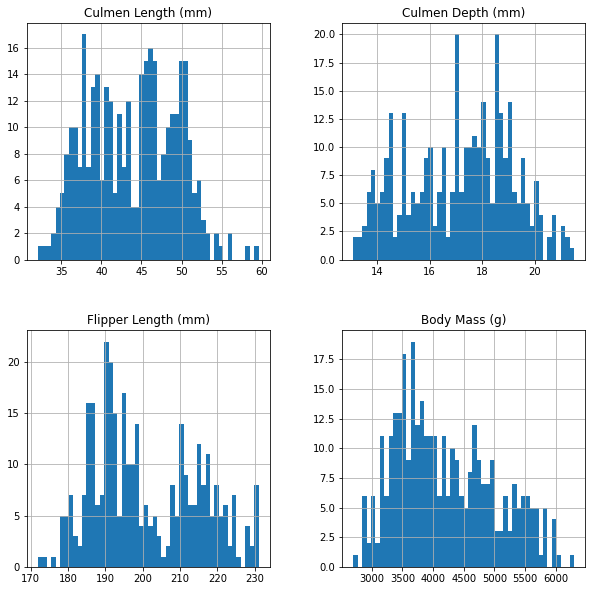

In [ ]:
penguins.hist( bins=50, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebe00c610>,
      dtype=object)

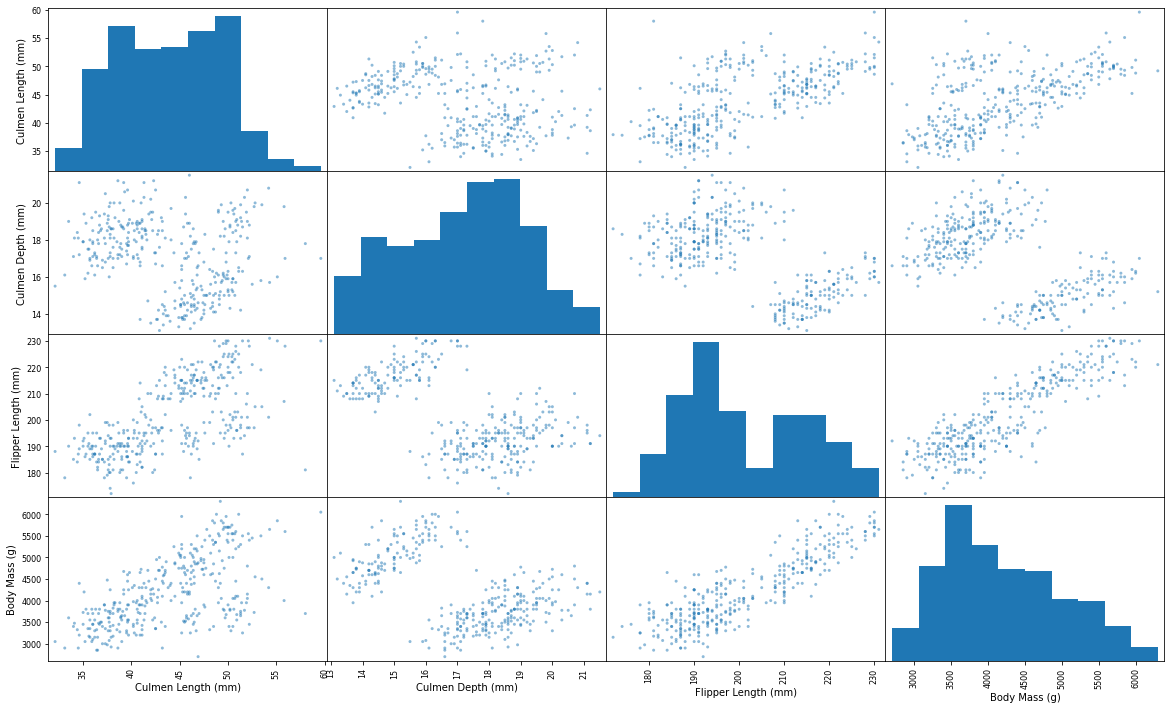

In [ ]:
scatter_matrix( penguins, figsize=(20,12))

###b) Find ordinal/ nominal and categorical data and convert them into numerical equivalent.

Species
Region
Island
Culmen Length (mm)
Culmen Depth (mm)
Flipper Length (mm)
Body Mass (g)
Sex






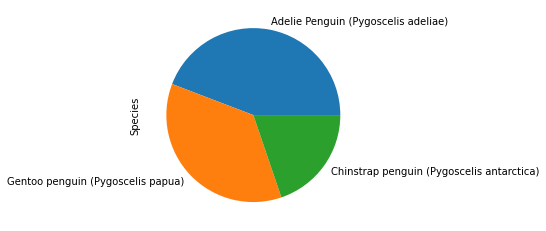

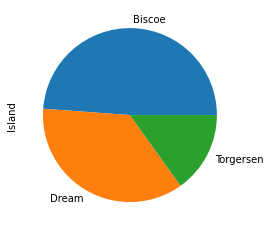

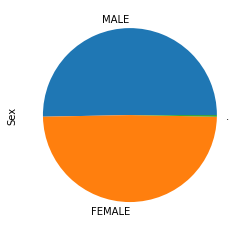

In [ ]:
for columns in penguins.columns:
  print( columns)

print('\n\n\n')
for attribute in ['Species', 'Island', 'Sex']:
  fig,ax=plt.subplots()
  penguins[attribute].value_counts().plot(ax=ax,kind='pie')


###c) Splitting data and training

In [ ]:
from sklearn.model_selection import train_test_split

penguins=penguins.dropna()

train_set, val_plus_test_set = train_test_split(penguins, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(penguins, test_size=0.333, random_state=42)

X_train= train_set[['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
y_train= train_set.loc[:, train_set.columns=='Species']
X_val= val_set[['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
y_val= val_set.loc[:, val_set.columns=='Species']


X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
292,48.2,15.6,221.0,5100.0
302,47.4,14.6,212.0,4725.0
62,37.6,17.0,185.0,3600.0
181,52.8,20.0,205.0,4550.0
15,36.6,17.8,185.0,3700.0


In [ ]:
y_train.head()

,Species
292,Gentoo penguin (Pygoscelis papua)
302,Gentoo penguin (Pygoscelis papua)
62,Adelie Penguin (Pygoscelis adeliae)
181,Chinstrap penguin (Pygoscelis antarctica)
15,Adelie Penguin (Pygoscelis adeliae)


In [ ]:
tree_clf= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf= 2)
tree_clf.fit( X_train, y_train)

y_pred= tree_clf.predict( X_val)

from sklearn.metrics import accuracy_score
print( accuracy_score( y_pred, y_val))

0.9954954954954955


###d) Visualization

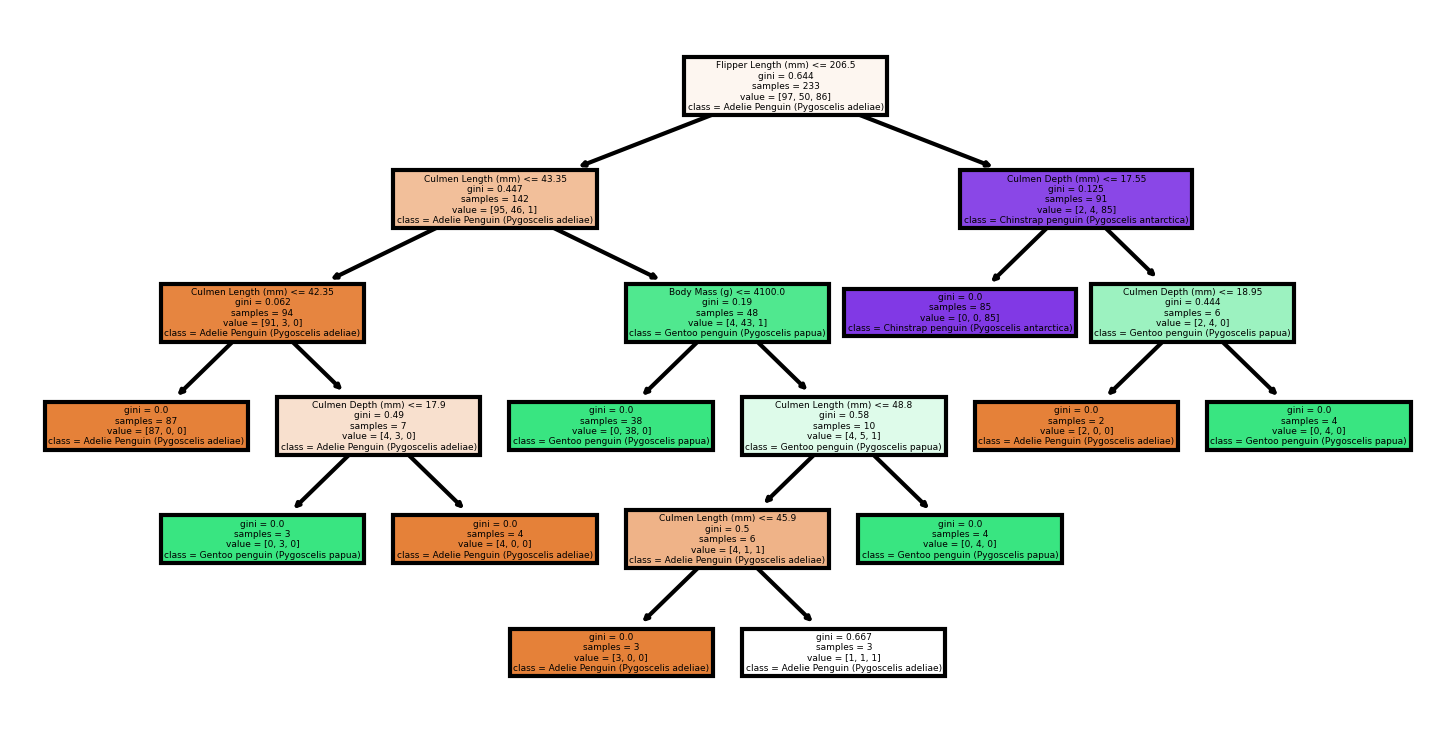

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt


fn=['Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)']

cn=['Adelie Penguin (Pygoscelis adeliae)',
    'Gentoo penguin (Pygoscelis papua)',
    'Chinstrap penguin (Pygoscelis antarctica)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=300)
tree.plot_tree(tree_clf,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('penguin_tree.png')

#Question 2

In [ ]:
data= pd.read_excel('/content/Dataset.xlsx')

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
x_test, x_validate, y_test, y_validate=train_test_split(x_test, y_test, train_size=2/3, random_state=1 )
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)
print('Validate', x_validate.shape, y_validate.shape)

Train (537, 8) (537,)
Test (154, 8) (154,)
Validate (77, 8) (77,)


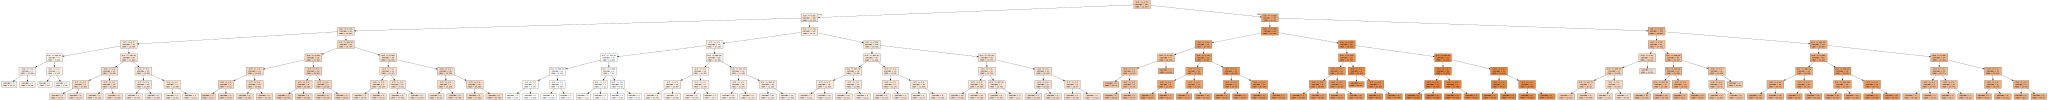

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=7, min_samples_split=2, min_samples_leaf=1)
tree.fit(x_train, y_train)
pred=tree.predict(x_validate)
mse=[]
mse.append(mean_squared_error(np.array(y_validate), np.array(pred)))
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Use different hyperparameters and check for the accuracy and make plots to analyze.